In [60]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import graphviz

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Just performing the data cleaning from Milestone 1

In [61]:
tv = pd.read_csv("tv_shows.csv")

tv["IMDb"] = tv["IMDb"].str.replace("/10","")
tv["IMDb"] = tv["IMDb"].astype(float)
tv["Rotten Tomatoes"] = tv["Rotten Tomatoes"].str.replace("/100","")
tv["Rotten Tomatoes"] = tv["Rotten Tomatoes"].astype(int)
tv

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4,100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7,96,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0,95,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8,94,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8,93,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5363,5363,5713,Paradise Islands,2017,NaN,NaN,10,0,0,0,1,1
5364,5364,5714,Mexico Untamed,2018,NaN,NaN,10,0,0,0,1,1
5365,5365,5715,Wild Centeral America,2020,NaN,NaN,10,0,0,0,1,1
5366,5366,5716,Wild Russia,2018,NaN,NaN,10,0,0,0,1,1


In [62]:
# Making a decision tree classifer to determine if a show is age 18+

In [ ]:
# First we have to remove the Na values in the data frame and make it suitable for the classification

In [64]:
tvAge = tv.dropna()
tvAge["Age"] = tvAge["Age"].str.replace("all","1")
tvAge["Age"] = tvAge["Age"].str.replace("+","")
tvAge["Age"] = tvAge["Age"].astype(int)
tvAge.dtypes

<ipython-input-64-35e3bcd2f014>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvAge["Age"] = tvAge["Age"].str.replace("all","1")
<ipython-input-64-35e3bcd2f014>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tvAge["Age"] = tvAge["Age"].str.replace("+","")
<ipython-input-64-35e3bcd2f014>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvAge["Age"] 

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                  int32
IMDb               float64
Rotten Tomatoes      int32
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object

In [ ]:
#For Milestone 1: multiple variable plot

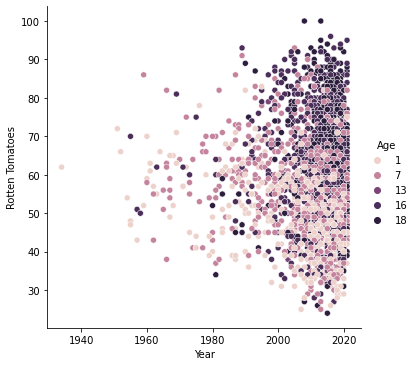

In [65]:
sns.relplot(x = "Year", y = "Rotten Tomatoes", hue = "Age", data = tvAge)

In [ ]:
# Created dummy variables to determine if a category is either

In [66]:
tv_age_new = pd.get_dummies(tvAge, columns = ["Age"], drop_first = True)
tv_age_new

,Unnamed: 0,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Age_7,Age_13,Age_16,Age_18
0,0,1,Breaking Bad,2008,9.4,100,1,0,0,0,1,0,0,0,1
1,1,2,Stranger Things,2016,8.7,96,1,0,0,0,1,0,0,1,0
2,2,3,Attack on Titan,2013,9.0,95,1,1,0,0,1,0,0,0,1
3,3,4,Better Call Saul,2015,8.8,94,1,0,0,0,1,0,0,0,1
4,4,5,Dark,2017,8.8,93,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,5336,5684,Disney Family Sundays,2019,5.6,31,0,0,0,1,1,0,0,0,0
5339,5339,5687,Wild Chile,2018,7.5,30,0,0,0,1,1,1,0,0,0
5340,5340,5688,Howie Mandel's Animals Doing Things,2018,3.2,30,0,0,0,1,1,0,0,0,0
5341,5341,5690,The Big Fib,2020,5.4,29,0,0,0,1,1,0,0,0,0


In [67]:
x = tv_age_new.drop(columns = ["Unnamed: 0", "Hulu", "Netflix", "Prime Video", "Disney+", "Title", "IMDb", "Type", "Age_7", "Age_13", "Age_16", "Age_18", "ID"])
y = tv_age_new["Age_18"]
x

,Year,Rotten Tomatoes
0,2008,100
1,2016,96
2,2013,95
3,2015,94
4,2017,93
...,...,...
5336,2019,31
5339,2018,30
5340,2018,30
5341,2020,29


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
tree10 = DecisionTreeClassifier(max_depth = 10)
tree10.fit(x_train, y_train)

y_test_preds = tree10.predict(x_test)
confusion_matrix(y_test,y_test_preds)

array([[404,  52],
       [139,  47]], dtype=int64)

In [73]:
def scatter_plot_data(x_df, y_series, ax):
    '''
    scatter_plot_data scatter plots the satellite data. A point in the plot is colored 'green' if 
    vegetation is present and 'gray' otherwise.
    
    input:
       x_df - a DataFrame of size N x 2, each row is a location, each column is a coordinate
       y_series - a Series of length N, each entry is either 0 (no vegetation) or 1 (vegetation)
       ax - axis to plot on
    returns: 
       ax - the axis with the scatter plot
    '''
    
    # convert x_df and y_series into numpy arrays
    x = x_df.values
    y = y_series.values
    
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='red', label='18+')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='black', label='Not 18+')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.legend(loc='best')
    return ax

def plot_decision_boundary(x_df, y_series, model, ax, plot_boundary_only=False):
    '''
    plot_decision_boundary plots the training data and the decision boundary of the classifier.
    input:
       x_df - a DataFrame of size N x 2, each row is a location, each column is a coordinate
       y_series - a Series of length N, each entry is either 0 (non-vegetation) or 1 (vegetation)
       model - the 'sklearn' classification model
       ax - axis to plot on
       poly_degree - the degree of polynomial features used to fit the model
    returns: 
       ax - the axis with the scatter plot
    
    '''
    
    # convert x_df and y_series into numpy arrays
    x = x_df.values
    y = y_series.values
    
    # Plot data
    if not plot_boundary_only:
        ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='red', label='18+')
        ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='black', label='Not 18+')
    
    # Create mesh
    interval = np.arange(0,1,0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)
    
    # Predict on mesh points
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    if not plot_boundary_only:
        ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    ax.contour(x1, x2, yy, colors='black', linewidths=0.1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.legend(loc='best')
    return ax

<ipython-input-73-6ec1efdb855f>:67: UserWarning: No contour levels were found within the data range.
  ax.contour(x1, x2, yy, colors='black', linewidths=0.1)
<ipython-input-73-6ec1efdb855f>:67: UserWarning: No contour levels were found within the data range.
  ax.contour(x1, x2, yy, colors='black', linewidths=0.1)


Text(0.5, 1.0, 'Decision Boundary on the Test Data')

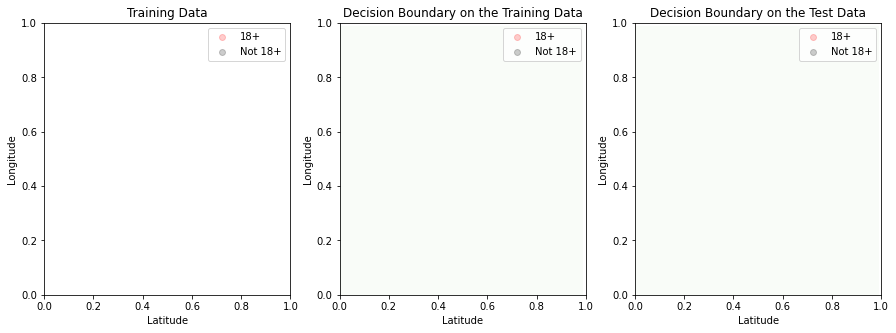

In [74]:
# set up to create two plots in the same image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# visualize the data on the first plot (ax[0])
scatter_plot_data(x_train, y_train, ax[0])
ax[0].set_title('Training Data')

#  plot the training data and decision tree boundary on the second plot (ax[1])
plot_decision_boundary(x_train, y_train, tree10, ax[1])
ax[1].set_title('Decision Boundary on the Training Data')

#  plot the test data and decision tree boundary on the third plot (ax[2])
plot_decision_boundary(x_test, y_test, tree10, ax[2])
ax[2].set_title('Decision Boundary on the Test Data')

<ipython-input-73-6ec1efdb855f>:67: UserWarning: No contour levels were found within the data range.
  ax.contour(x1, x2, yy, colors='black', linewidths=0.1)
<ipython-input-73-6ec1efdb855f>:67: UserWarning: No contour levels were found within the data range.
  ax.contour(x1, x2, yy, colors='black', linewidths=0.1)


Text(0.5, 1.0, 'Decision Boundary on the Test Data')

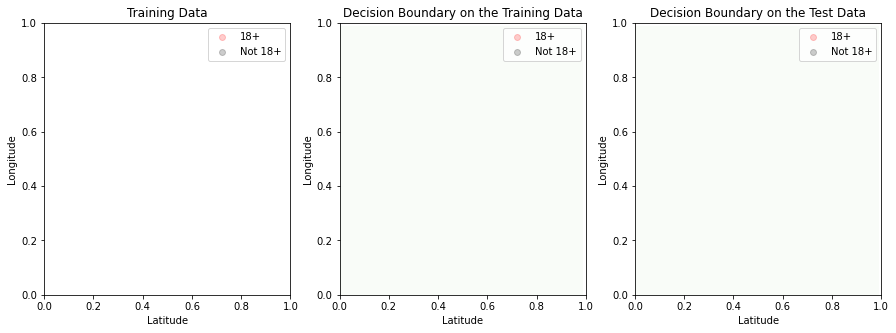

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

tree1 = DecisionTreeClassifier(max_depth = 2)
tree1.fit(x_train,y_train)

# set up to create three plots in the same image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# visualize the data on the first plot (ax[0])
scatter_plot_data(x_train, y_train, ax[0])
ax[0].set_title('Training Data')

#  plot the training data and decision tree boundary on the second plot (ax[1])
plot_decision_boundary(x_train, y_train, tree1, ax[1])
ax[1].set_title('Decision Boundary on the Training Data')


#  plot the test data and decision tree boundary on the third plot (ax[2])
plot_decision_boundary(x_test, y_test, tree1, ax[2])
ax[2].set_title('Decision Boundary on the Test Data')

[Text(167.4, 181.2, 'Year <= 2016.5\ngini = 0.39\nsamples = 2565\nvalue = [1883, 682]'),
 Text(83.7, 108.72, 'Rotten Tomatoes <= 66.5\ngini = 0.29\nsamples = 1505\nvalue = [1240, 265]'),
 Text(41.85, 36.23999999999998, 'gini = 0.221\nsamples = 1090\nvalue = [952, 138]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.425\nsamples = 415\nvalue = [288, 127]'),
 Text(251.10000000000002, 108.72, 'Rotten Tomatoes <= 59.5\ngini = 0.477\nsamples = 1060\nvalue = [643, 417]'),
 Text(209.25, 36.23999999999998, 'gini = 0.425\nsamples = 630\nvalue = [437, 193]'),
 Text(292.95, 36.23999999999998, 'gini = 0.499\nsamples = 430\nvalue = [206, 224]')]

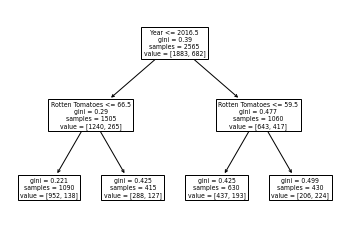

In [81]:
from sklearn.tree import plot_tree

plot_tree(tree1, feature_names = x.columns)

In [ ]:
#Decision regression based on the IMDb ratings

In [31]:
x = tvAge.drop(columns = ["Rotten Tomatoes", "Unnamed: 0", "Title", "IMDb", "Year", "Age", "ID"])
y = tvAge["IMDb"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
tree5 = DecisionTreeRegressor(max_depth = 5)
tree5.fit(x_train,y_train)

train_preds5 = tree5.predict(x_train)
test_preds5 = tree5.predict(x_test)

In [32]:
mean_squared_error(train_preds5,y_train)

1.1293162481417969

In [33]:
mean_squared_error(test_preds5,y_test)

1.320551038657345

In [36]:
with open ("tv5IMDb.dot", "r") as fin:
    with open("tv_fixed5IMDb.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","Netflix")
            line = line.replace("X[1]","Hulu")
            line = line.replace("X[2]","Prime Video")
            line = line.replace("X[3]","Disney+")
            fout.write(line)

In [35]:
dot_data = export_graphviz(tree5, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tv5IMDb.dot")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
#For milestone 1

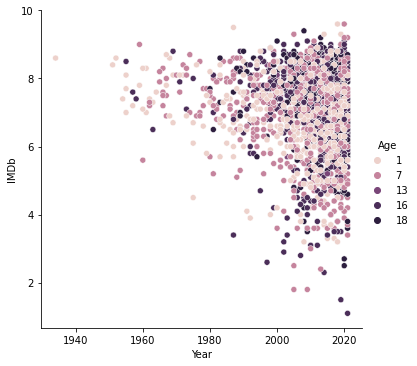

In [82]:
sns.relplot(x = "Year", y = "IMDb", hue = "Age", data = tvAge)